In [5]:
!pip install opencv_python_headless
import os
import matplotlib.pyplot as plt 
import cv2
import random

   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.4 MB ? eta -:--:--
    --------------------------------------- 0.5/39.4 MB 2.4 MB/s eta 0:00:17
   - -------------------------------------- 1.8/39.4 MB 3.6 MB/s eta 0:00:11
   -- ------------------------------------- 2.4/39.4 MB 3.3 MB/s eta 0:00:12
   -- ------------------------------------- 2.9/39.4 MB 2.9 MB/s eta 0:00:13
   --- ------------------------------------ 3.4/39.4 MB 2.9 MB/s eta 0:00:13
   --- ------------------------------------ 3.7/39.4 MB 2.7 MB/s eta 0:00:14
   ---- ----------------------------------- 4.2/39.4 MB 2.6 MB/s eta 0:00:14
   ---- ----------------------------------- 4.7/39.4 MB 2.6 MB/s eta 0:00:14
   ----- ---------------------------------- 5.2/39.4 MB 2.6 MB/s eta 0:00:14
   ----- ---------------------------------- 5.8/39.4 MB 2.5 MB/s eta 0:00:14
   ------ --------------------------------- 6.3/39.4 MB 2.5 MB/s eta 0:00:14
   ------ ---

In [7]:
#define paths
train_dir='C:/Users/Admin/Downloads/chest_xray/train'
test_dir='C:/Users/Admin/Downloads/chest_xray/test'

In [9]:
#checking classes
classes=os.listdir(train_dir)
print("Classes",classes)

Classes ['NORMAL', 'PNEUMONIA']


In [11]:
#visualize some images
def plot_sample_images(data_dir, classes, samples_per_class=5):
    plt.figure(figsize=(12, 6))
    for cls_idx, cls_name in enumerate(classes):
        img_folder = os.path.join(data_dir, cls_name)
        img_files = os.listdir(img_folder)
        
        for i in range(samples_per_class):
            img_path = os.path.join(img_folder, random.choice(img_files))
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(classes), samples_per_class, cls_idx * samples_per_class + i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(cls_name)
    
    plt.tight_layout()
    plt.show()

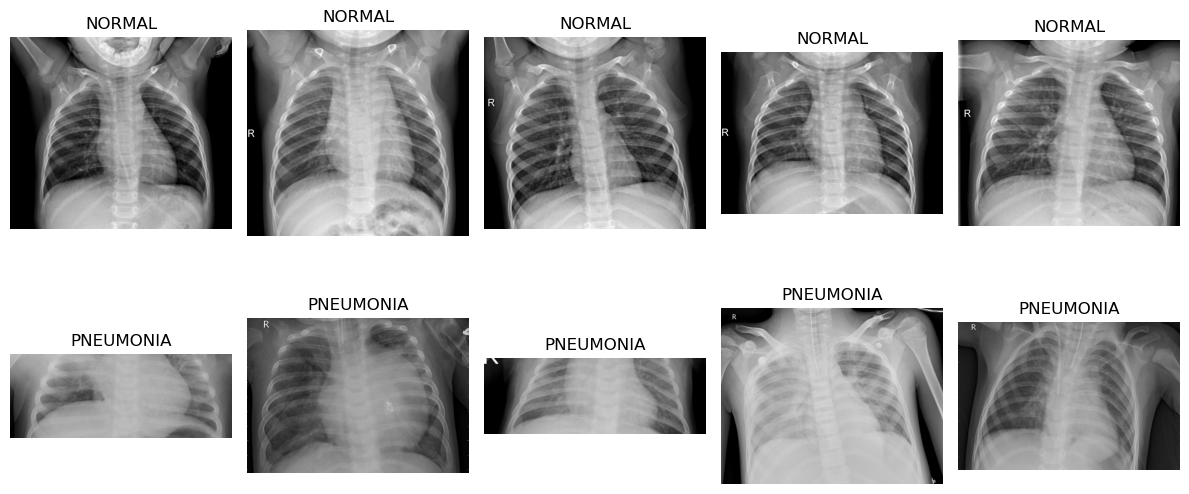

In [13]:
# Plotting sample images
plot_sample_images(train_dir, classes)

In [17]:
#BUILDING CNN MODEL
!pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 4.2 MB/s eta 0:01:29
   ---------------------------------------- 1.8/376.0 MB 4.8 MB/s eta 0:01:19
   ---------------------------------------- 2.6/376.0 MB 4.9 MB/s eta 0:01:17
   ---------------------------------------- 3.1/376.0 MB 4.1 MB/s eta 0:01:31
   ---------------------------------------- 3.7/376.0 MB 3.8 MB/s eta 0:01:39
   ---------------------------------------- 4.2/376.0 MB 3.5 MB/s eta 0:01:47
    --------------------------------------- 4.7/376.0 MB 3.3 MB/s eta 0:01:52
    --------------------------------------- 5.2/376.0 MB 3.2 MB/s eta 0:01:57
    --------------------------------------- 5.8/376.0 MB 3.1 MB/s eta 0:02:00
    --------------------------------------- 6.3/376.0 MB 3.0 MB/s eta 0:02:02
    --------------------------------------- 6.8/376.0 MB 3.0 MB/s eta 0:02:05
    --------------------------------------- 7.1/376.0 MB 2.9 MB/s eta 0

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

# Model architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1019s 6s/step - accuracy: 0.8092 - loss: 0.5694 - val_accuracy: 0.7324 - val_loss: 0.8284
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 608s 4s/step - accuracy: 0.9693 - loss: 0.0922 - val_accuracy: 0.7292 - val_loss: 1.2519
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 648s 4s/step - accuracy: 0.9669 - loss: 0.0959 - val_accuracy: 0.7548 - val_loss: 1.0728
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 678s 4s/step - accuracy: 0.9745 - loss: 0.0722 - val_accuracy: 0.7244 - val_loss: 1.2158
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 612s 4s/step - accuracy: 0.9829 - loss: 0.0466 - val_accuracy: 0.7516 - val_loss: 1.2639
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 541s 3s/step - accuracy: 0.9826 - loss: 0.0432 - val_accuracy: 0.7340 - val_loss: 1.5078
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 605s 4s/step - accuracy: 0.9835 - loss: 0.0415 - val_accuracy: 0.7821 - val_loss: 1.3568
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 526s 3s/step - accuracy: 0.9918 - loss: 0.0201 - val_acc

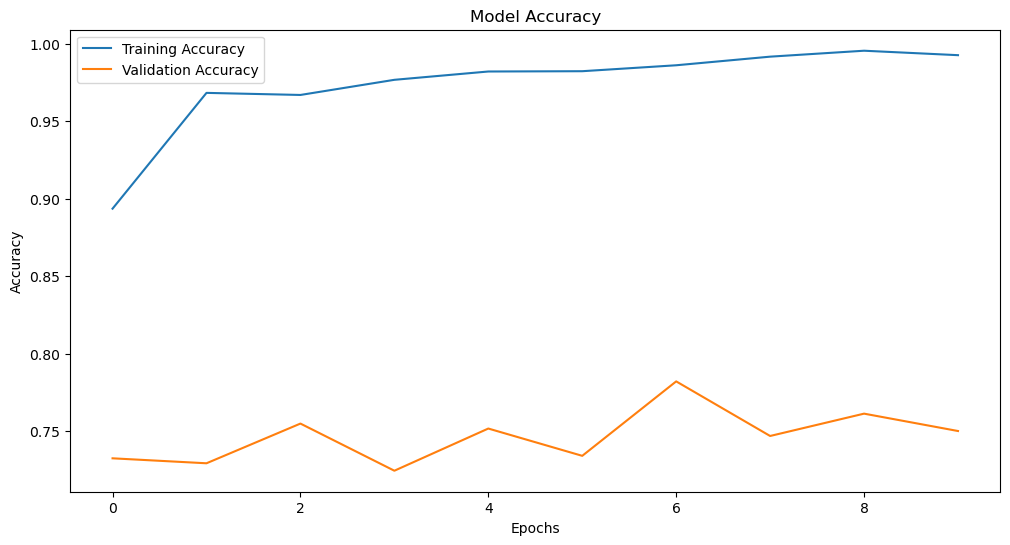

In [24]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


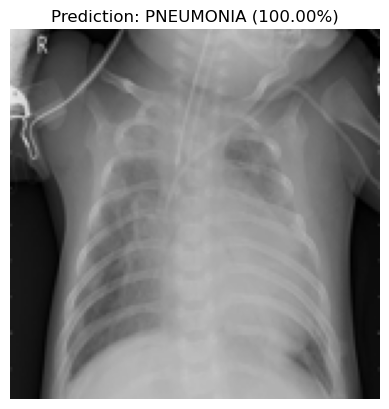

In [33]:

from PIL import Image
IMG_SIZE = 150
import numpy as np
def predict_image(model, img_path):
    img = Image.open(img_path).convert('RGB')
    img = img.resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)

    prediction = model.predict(img_array)[0][0]
    label = "PNEUMONIA" if prediction > 0.5 else "NORMAL"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    plt.imshow(img)
    plt.title(f"Prediction: {label} ({confidence * 100:.2f}%)")
    plt.axis('off')
    plt.show()

# Example prediction
sample_image = r'C:\Users\Admin\Downloads\chest_xray\test\PNEUMONIA\person1_virus_6.jpeg'
predict_image(model, sample_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


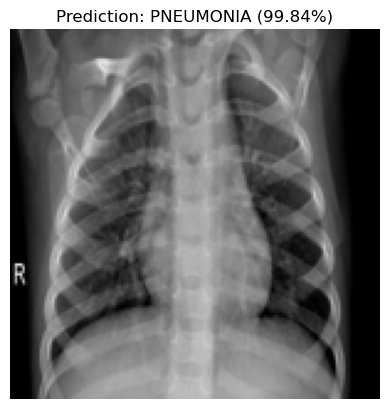

In [35]:
# Example prediction with the specific image
sample_image = r'C:\Users\Admin\Downloads\chest_xray\test\PNEUMONIA\IM-0102-0001.jpeg'
predict_image(model, sample_image)
